**Нажать перед началом работы**

In [27]:
!pip3 install wbdata
import wbdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline

**1. Введение**

Экономический рост страны зависит от того, как эффективно используются основные факторы производства — труд и капитал. Под экономическим ростом принято понимать увеличение объема произведенных товаров и услуг внутри страны в долгосрочной перспективе. Для того чтобы оценить вклад различных факторов в этот процесс, в экономической теории применяется производственная функция.

Производственная функция представляет собой математическую модель, описывающую зависимость между объемом выпускаемой продукции и используемыми ресурсами. С ее помощью можно не только оценить текущее состояние экономики, но и как изменения в факторах производства отражается на будущих темпах роста.

Однако практическое применение модели производственной функции требует ряда допущений касающихся различных параметров, например технического прогресса или условий функционирования рынка.
Довольно часто в эмпирических исследованиях используется неоклассическая двухфакторная функция Кобба-Дугласа.

Эта модель предполагает:
1. Если труд или капитал исчезнет, то и выпуск тоже.
2. Вклад дополнительного работника равен постоянной доле скажем α от выпуска на одного работника
3. Вклад дополнительной единицы капитала равен постоянной доле скажем β от выпуска на единицу капитала.

Тем не менее, важно отметить, что данные предположения далеко не всегда верны в реальной экономике, а потому модель имеет более теоретический характер и показывает лишь тенденцию роста, а не всю закономерность.

Новые исследования указывают, что функция Кобба-Дугласа во многих случаях плохо согласуется с эмпирическии даннымми, так Gechert (2019) показал, что широко используемое допущение о стабильной эластичности замещения между трудом и капиталом не подтверждается статистически.













**2. Производственная функция Кобба-Дугласа**

Стандартным определением функции Кобба-Дугласа является:

$$Y = A \cdot K^\alpha \cdot L^\beta$$

Где 𝑌 — общий объем производства (денежная стоимость всех товаров, произведенных за год).

𝐴 — производственный коэффициент.

𝐾 — капитал (денежная стоимость всего оборудования)

𝐿 — труд (количество человеко-часов в год)

𝛼, 𝛽 — коэффициенты эластичности объема производства по затратам капитала и труда.

Коэффициенты эластичности 𝛼, 𝛽 показывают, на сколько процентов изменится объем выпуска 𝑌 при увеличении соотвествующего фактора производства (капитала 𝐾 или труда 𝐿) на 1%. Например, если 𝛼 = 0,15, то увеличение затрат капитала на 1% приведет к росту выпуска примерно на 0,15%. Аналогично, если 𝛽 = 0,31, то увеличение труда на 1% вызовет рост выпуска на 0,31%.

Одним из важных свойств функции является сумма коэффициентов эластичности (𝛼 + 𝛽).

Если 𝛼 + 𝛽 = 1, то функция Кобба–Дугласа является линейно однородной, то
есть она демонстрирует постоянную отдачу при изменении масштабов производства. Так, например, если 𝐿 и 𝐾 увеличить на 20%, то и 𝑌 увеличится на 20%.

Если 𝛼 + 𝛽 > 1, функция отражает возрастающую отдачу.

Если 𝛼 + 𝛽 < 1 – убывающую.

Для эмпирической оценки параметров функции Кобба-Дугласа на реальных данных используется логарифмическая форма уравнения:

$$ \ln (Y) = \ln (A) + \alpha \ln (K) + \beta \ln (L) $$

Данная форма удобна тем, что является линеной относительно логарифмов, а потому допускает использование методов линейной регрессии для нахождения коэффициентов 𝛼 и 𝛽.





**3. Эмпирический анализ**

**3.1 Исходные данные**

Для эмпирического анализа были использованы данные по экономике Нидерландов, полученные через API всемирного банка (World Bank) с использованием библиотеки wbdata.

Wbdata – это простой интерфейс Python для поиска и запроса информации из
различных баз данных Всемирного банка (data.worldbank.org), как в виде словаря с
полными метаданными, так и в виде объекта Pandas DataFrame. В настоящее время
wbdata представляет собой оболочку для большей части API Всемирного банка , а также
добавляет ряд удобных функций для поиска и извлечения информации
(wbdata.readthedocs.io).

**3.2 Определение экономических индикаторов**

Перед тем как приступить к самому анализу данных, необходимо определить эмпирические аналоги теоретических переменных:

𝑌 = GDP (constant 2015 US$)

ВВП (Gross Domestic Product – GDP) представляет собой рыночную стоимость
всех конечных товаров и услуг, произведённых за год во всех отраслях экономики на территории определенной страны для потребления, экспорта и накопления, вне зависимости от национальной принадлежности использованных факторов производства.

𝐾 = GCF (constant 2015 US$)

(Gross capital formation – GCF), включает в себя затраты на накопление основного капитала, изменение запасов материальных оборотных средств, а также приобретение ценностей за вычетом их выбытия.

𝐿 = Labor force, total

Общая численность рабочей силы. Показатель отражает объем трудовых ресурсов, участвующих в производственном процессе.

In [28]:
indicators = {
    "NY.GDP.MKTP.KD": "gdp",
    "NE.GDI.TOTL.KD": "capital",
    "SL.TLF.TOTL.IN": "labor"
}

**3.3 Корректировка и первоначальный анализ**

Получаем данные по выбранным индикаторам и сортируем по году наблюдений.

In [29]:
data = wbdata.get_dataframe(indicators=indicators, country="NLD")
data = data.sort_index()
data

,gdp,capital,labor
date,,,
1960,1.650626e+11,NaN,NaN
1961,1.655505e+11,NaN,NaN
1962,1.768799e+11,NaN,NaN
1963,1.832912e+11,NaN,NaN
1964,1.984583e+11,NaN,NaN
...,...,...,...
2020,8.212606e+11,1.756586e+11,9778411.0
2021,8.728097e+11,1.941181e+11,9842958.0
2022,9.165134e+11,2.050312e+11,10054815.0


Видим, что есть незаполненные поля, однако в контексте нашей модели эти данные бесполезны, а потому необходимо избавиться от них.

Также на всякий случай удалим дупликаты, если они есть.

In [30]:
data = data.dropna()
data = data.drop_duplicates()
data.head()

,gdp,capital,labor
date,,,
1990,4.681155e+11,9.583698e+10,8142834.0
1991,4.795335e+11,9.625813e+10,8214740.0
1992,4.877147e+11,9.875633e+10,8296742.0
1993,4.938479e+11,9.149828e+10,8358232.0
1994,5.084712e+11,9.684610e+10,8405080.0


Теперь, избавившись от пропусков и дупликатов, переиндексируем наши данные, и вместо индексации по годам, перейдем в стандартную 0-индексацию, предварительно добавив столбец 'year'.


Также, присмотревшись видим, что данные слишком большие для интерпретации и сравнения показателей, а потому для лучшей визуализации проведем нормализацию данных, приведя все значения к относительным величинамм относительно базового года (1990).


Формула для нормализации данных:

$$ X_{norm} = \frac{X_{t}}{X_{0}} ⋅ 100 $$

где:

$X_{norm}$ – нормализированное значение показателя

$X_{t}$ – значение показателя в году 𝑡

$X_{0}$ – значение в базовом году

Тогда формула для обратного преобразования будет выглядеть следующим образом:

$$ X_{t} = X_{norm} ⋅ \frac{X_{0}}{100} $$

In [31]:
data = data.reset_index().rename(columns={'date': 'year'})
base_date = data['year'].loc[0]
base_gdp = data['gdp'].loc[0]
base_capital = data['capital'].loc[0]
base_labor = data['labor'].loc[0]

In [32]:
data['gdp'] = data['gdp'] / base_gdp * 100
data['capital'] = data['capital'] / base_capital * 100
data['labor'] = data['labor'] / base_labor * 100
data.head()

,year,gdp,capital,labor
0,1990,100.000000,100.000000,100.000000
1,1991,102.439135,100.439447,100.883059
2,1992,104.186819,103.046170,101.890104
3,1993,105.497023,95.472834,102.645246
4,1994,108.620887,101.052962,103.220574


Хоть мы и нормализовали данные, однако не будет лишним дополнительно визуализировать наши данные на графиках, чтобы понять с чем мы имеем дело

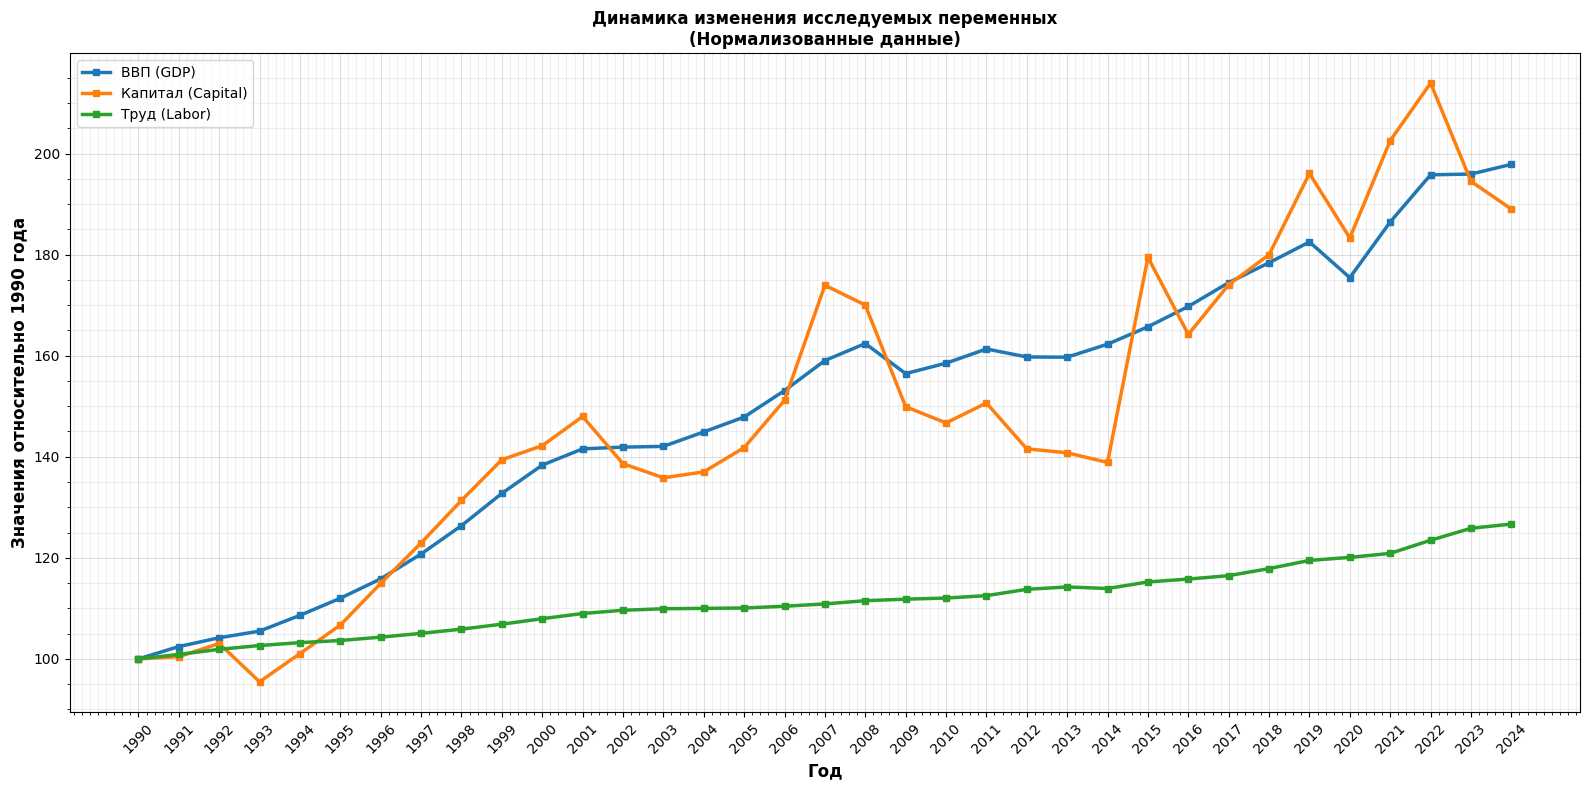

In [33]:
plt.figure(figsize=(16, 8))

plt.plot(data['year'], data['gdp'], label='ВВП (GDP)', linewidth=2.5, marker='s', markersize=4)
plt.plot(data['year'], data['capital'], label='Капитал (Capital)', linewidth=2.5, marker='s', markersize=4)
plt.plot(data['year'], data['labor'], label='Труд (Labor)', linewidth=2.5, marker='s', markersize=4)

plt.xlabel('Год', fontsize=12, fontweight='bold')
plt.ylabel('Значения относительно 1990 года', fontsize=12, fontweight='bold')
plt.title('Динамика изменения исследуемых переменных\n(Нормализованные данные)', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.grid(True, alpha=0.4)
plt.legend()

plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)

plt.tight_layout()
plt.show()

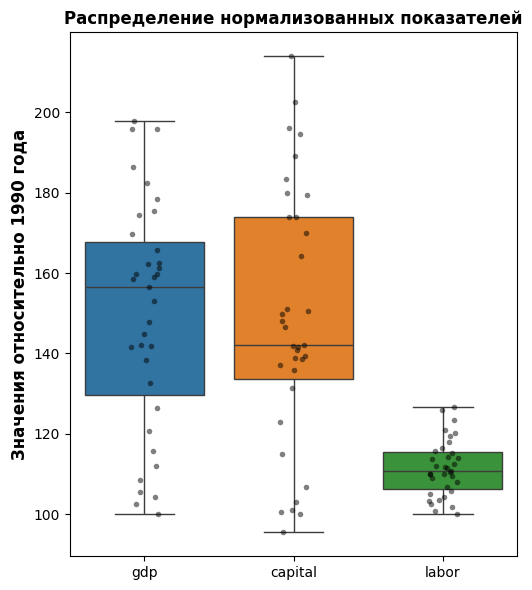

In [34]:


plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
box_data = data[['gdp', 'capital', 'labor']]
sns.boxplot(data=box_data)
plt.title('Распределение нормализованных показателей', fontweight='bold')
plt.ylabel('Значения относительно 1990 года', fontweight='bold', size=12)

sns.stripplot(data=box_data, color="black", alpha=0.5, size=4)

plt.tight_layout()
plt.show()

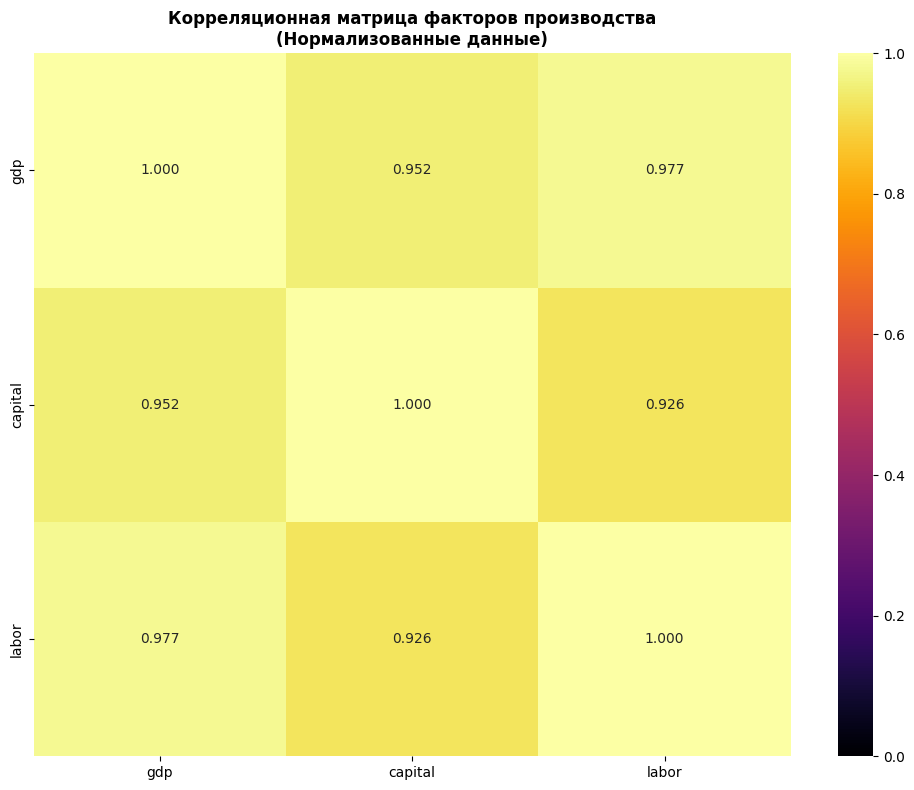

In [35]:
plt.figure(figsize=(10, 8))

corr_matrix = data[['gdp', 'capital', 'labor']].corr()

corr_matrix
sns.heatmap(corr_matrix, annot=True, fmt='.3f',vmin=0, vmax=1,cmap='inferno')

plt.title('Корреляционная матрица факторов производства\n(Нормализованные данные)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

Видим, что корреляция между капиталом и рабочей силой 92,6%, что свидетельствует о сильной мультиколлинеарности, т.е, что один из факторов производства можно выразить как линейную комбинацию остальных, а в нашем же случае, нарушается предположение о том, что 𝐾 и 𝐿 независимые факторы, что является критическим допущением при использовании модели Кобба-Дугласа.

**3.4 Постановка задачи линейной регрессии**

Вспомним вид нашей модели и поставим задачу более формально, для того чтобы определить нужный нам инструмент

$$ \ln (Y) = \ln (A) + \alpha \ln (K) + \beta \ln (L) $$

Для того чтобы аппроксимировать значения ВВП нам нужно восстановить значения 𝐴, 𝛼 и 𝛽.

Для начала введем обозначения и поставим задачу линейной регрессии

Пусть $X^l = (x_i, y_i)_{i=1}^l, x_i \in \mathbb{R^2}, y_i \in \mathbb{R}$ – обучающая выборка

(В нашем случае $y_i = \ln Y_i$, а $x_i = (\ln K_i, \ln L_i)^T$.

Модель регрессии – линейная:

$$ a(\tilde x,w)=\left\langle \tilde x, w\right\rangle = \displaystyle\sum\limits_{j=0}^{2} \tilde x_j\, w_j $$

где:

  $$\tilde x=\begin{pmatrix} \tilde x_0\\ \tilde x_1\\ \tilde x_2 \end{pmatrix} =\begin{pmatrix} 1\\ \ln K\\ \ln L \end{pmatrix}, \qquad$$

а,

$$w=\begin{pmatrix} w_0\\ w_1\\ w_2 \end{pmatrix} =\begin{pmatrix} \ln A\\ \alpha\\ \beta \end{pmatrix}. \qquad$$


Функция потерь – квадратичная (MSE):

$$\mathcal{L}(𝑎,𝑦) = (𝑎-𝑦)^2$$

Метод обучения – метод наименьших квадратов (МНК):

$$𝑄(𝑤) = \sum_{i=1}^{l}\bigl(a(\tilde x_i,w)-y_i\bigr)^2 \;\rightarrow\; \min_{w}$$

Ровно эту задачу оптимизации и решает МНК.



**3.5 Определение коэффициентов линейной модели**

Для начала векторизируем все наши данные для дальнейшей работы с ними

In [36]:
data['log_gdp'] = np.log(data['gdp'])
data['log_capital'] = np.log(data['capital'])
data['log_labor'] = np.log(data['labor'])

x = np.column_stack((np.ones(len(data)), data['log_capital'].values, data['log_labor'].values))
y = data['log_gdp'].values

In [37]:
model = sm.OLS(y,x)
results = model.fit()

lnA, alpha, beta = results.params
A = np.exp(lnA)


print(f"A = {A}\nalpha = {alpha}\nbeta = {beta}")

print(results.summary())

A = 0.004623033815009687
alpha = 0.409656656445212
beta = 1.7671075230464126
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     434.1
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           6.51e-24
Time:                        09:26:59   Log-Likelihood:                 65.591
No. Observations:                  35   AIC:                            -125.2
Df Residuals:                      32   BIC:                            -120.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

R-squared 0.964 - значение очень близко к 1, т.е модель очень неплохо описывает зависимость.

F-statistics: 434.1 - проверяет гипотезу $H_0: \alpha = \beta = 0$, так как значение F огромно, то мы отвергаем гипотезу $H_0$

Prob (F-statistics): показывает уровень значимости F-статистики, а т.к у нас p-value ≈ 0, то мы можем уверенно отвергать $H_0$ и говорить о том, что наша модель статистически значима.

Уровень стандартной ошибки во всех 3 случаях приемлимый

t-статистика говорит о том, что все 3 переменные являются статистически значимыми.

Также видим, что ни один из доверительных интервалов не включает 0, что еще раз подтверждает гипотезу о статистической значимости всех переменных

Durbin-Watson: 0.421 - значение довольно близко к 0, а потому существует немалая вероятность того, что присутствуют сильная положительная автокорреляция.
То есть нарушается предположение линейной регрессии, что ошибки независиммы. Также искажаются значения стандартных ошибок и завышается значение t-статистик, что может ввести в заблуждение о статистической значимости коэффициентов модели.
Также это означает, что наша модель не учитывает все факторы.

В замечаниях написано, что существует возможность сильной мультиколлинеарности, что совпадает с нашим первоначальным анализом







Построим плоскость которую задает функция Кобба-Дугласа

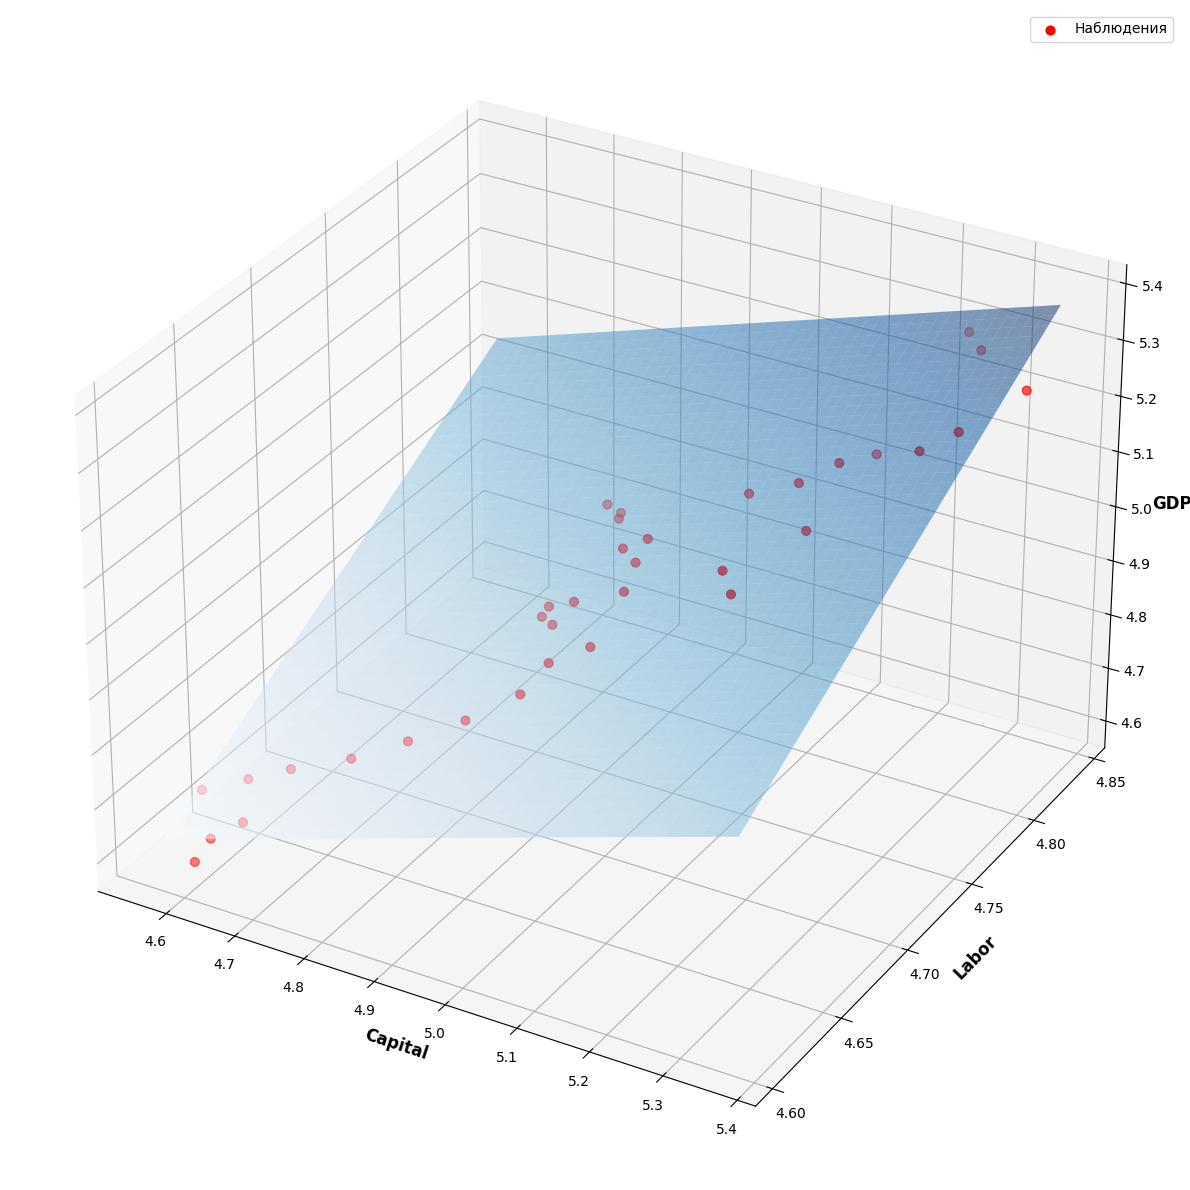

In [38]:
from mpl_toolkits.mplot3d import Axes3D

# Нормализованные данные
X_capital = data['log_capital'].values
X_labor = data['log_labor'].values
Y_gdp = data['log_gdp'].values

capital_range = np.linspace(X_capital.min(), X_capital.max(), 50)
labor_range = np.linspace(X_labor.min(), X_labor.max(), 50)
K, L = np.meshgrid(capital_range, labor_range)


Y_plane =  lnA + (K)*alpha + (L)*beta

# Y_plane = base_gdp / 100 * A * (C/base_capital*100)**alpha * (L/base_labor*100)**beta

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_capital, X_labor, Y_gdp, color='red', s=40, label='Наблюдения')

ax.plot_surface(K, L, Y_plane, alpha=0.5, cmap='Blues')



ax.set_xlabel('Capital', fontsize=12, fontweight='bold')
ax.set_ylabel('Labor', fontsize=12, fontweight='bold')
ax.set_zlabel('GDP', fontsize=12, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()


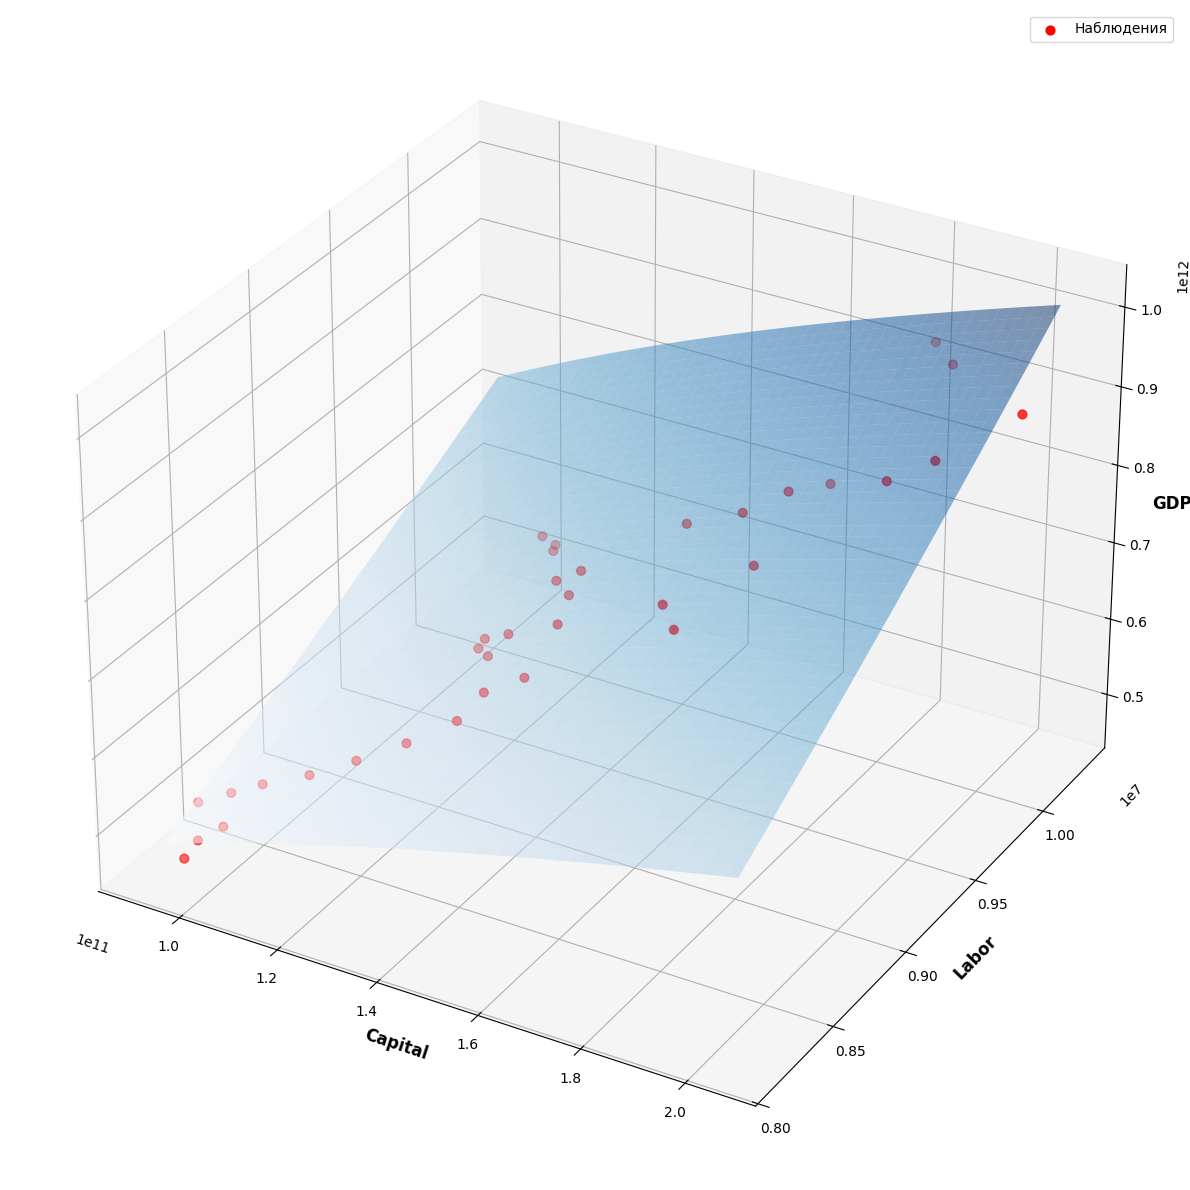

In [39]:
from mpl_toolkits.mplot3d import Axes3D

# Фактические данные
X_capital = data['capital'].values * base_capital / 100
X_labor = data['labor'].values * base_labor / 100
Y_gdp = data['gdp'].values * base_gdp / 100

capital_range = np.linspace(X_capital.min(), X_capital.max(), 50)
labor_range = np.linspace(X_labor.min(), X_labor.max(), 50)
K, L = np.meshgrid(capital_range, labor_range)


Y_plane = base_gdp / 100 * A * (K/base_capital*100)**alpha * (L/base_labor*100)**beta

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_capital, X_labor, Y_gdp, color='red', s=40, label='Наблюдения')

ax.plot_surface(K, L, Y_plane, alpha=0.5, cmap='Blues')

ax.set_xlabel('Capital', fontsize=12, fontweight='bold')
ax.set_ylabel('Labor', fontsize=12, fontweight='bold')
ax.set_zlabel('GDP', fontsize=12, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()


**3.5 Прогнозы**

In [40]:
data['pred_log_gdp'] = results.predict(x)
data['pred_gdp'] = np.exp(data['pred_log_gdp'])
data['difference_gdp'] = data['gdp']-data['pred_gdp']
mse = (data['difference_gdp']**2).mean()

print(mse)
data[['gdp','pred_gdp','difference_gdp']].head()

35.17809522896797


,gdp,pred_gdp,difference_gdp
0,100.000000,104.341104,-4.341104
1,102.439135,106.165348,-3.726213
2,104.186819,109.185292,-4.998473
3,105.497023,107.213633,-1.716610
4,108.620887,110.826969,-2.206082


Построим графики для лучшего представления

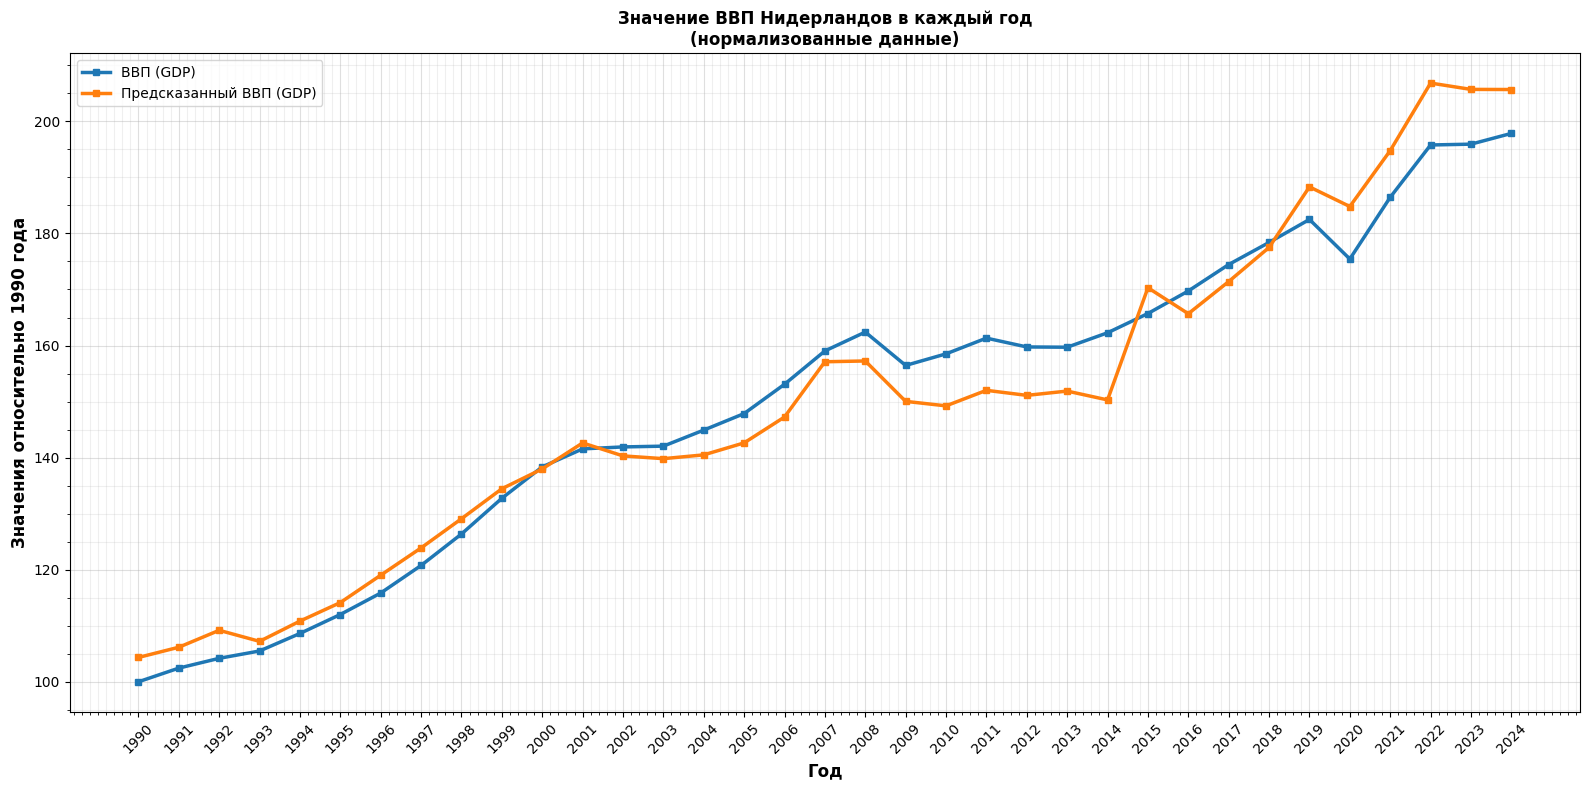

In [41]:
plt.figure(figsize=(16, 8))

plt.plot(data['year'], data['gdp'], label='ВВП (GDP)', linewidth=2.5, marker='s', markersize=4)
plt.plot(data['year'], data['pred_gdp'], label='Предсказанный ВВП (GDP)', linewidth=2.5, marker='s', markersize=4)

plt.xlabel('Год', fontsize=12, fontweight='bold')
plt.ylabel('Значения относительно 1990 года', fontsize=12, fontweight='bold')
plt.title('Значение ВВП Нидерландов в каждый год\n(нормализованные данные)', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.grid(True, alpha=0.4)
plt.legend()

plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)

plt.tight_layout()
plt.show()

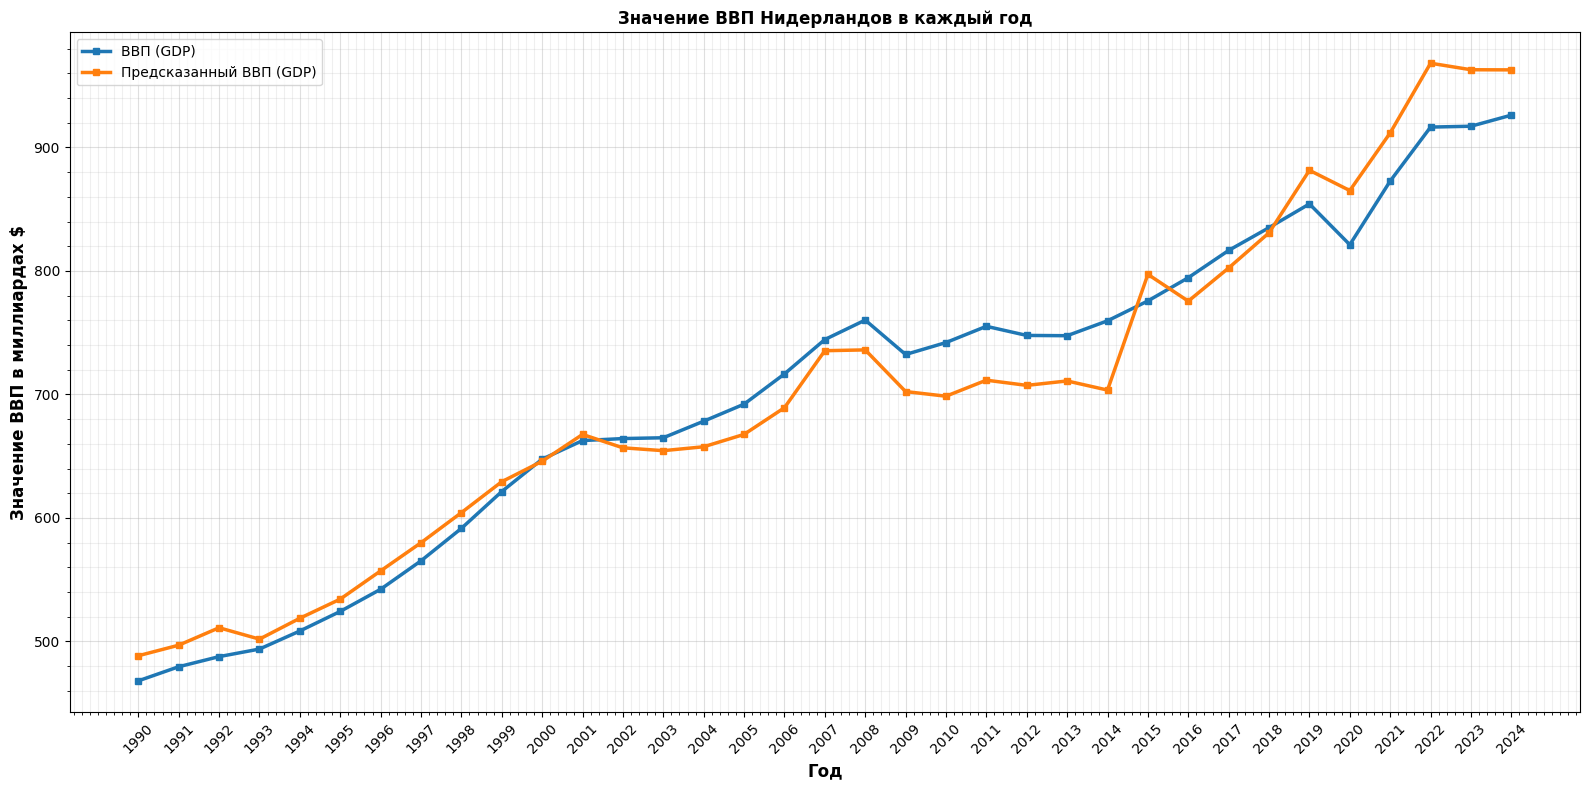

In [42]:
data['gdp_real'] = data['gdp'] * base_gdp / 100
data['capital_real'] = data['capital'] * base_capital / 100
data['labor_real'] = data['labor'] * base_labor / 100


data['pred_gdp_real'] = data['pred_gdp'] * base_gdp / 100



data['gdp_real_bil'] = data['gdp_real'] / 1e9
data['pred_gdp_real_bil'] = data['pred_gdp_real'] / 1e9

plt.figure(figsize=(16, 8))

plt.plot(data['year'], data['gdp_real_bil'], label='ВВП (GDP)', linewidth=2.5, marker='s', markersize=4)
plt.plot(data['year'], data['pred_gdp_real_bil'], label='Предсказанный ВВП (GDP)', linewidth=2.5, marker='s', markersize=4)

plt.xlabel('Год', fontsize=12, fontweight='bold')
plt.ylabel('Значение ВВП в миллиардах $', fontsize=12, fontweight='bold')
plt.title('Значение ВВП Нидерландов в каждый год', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.grid(True, alpha=0.4)
plt.legend()

plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)

plt.tight_layout()
plt.show()



**3.6 Основные экономико-математические характеристики производственной функции**

**3.6.1 Изокванты**

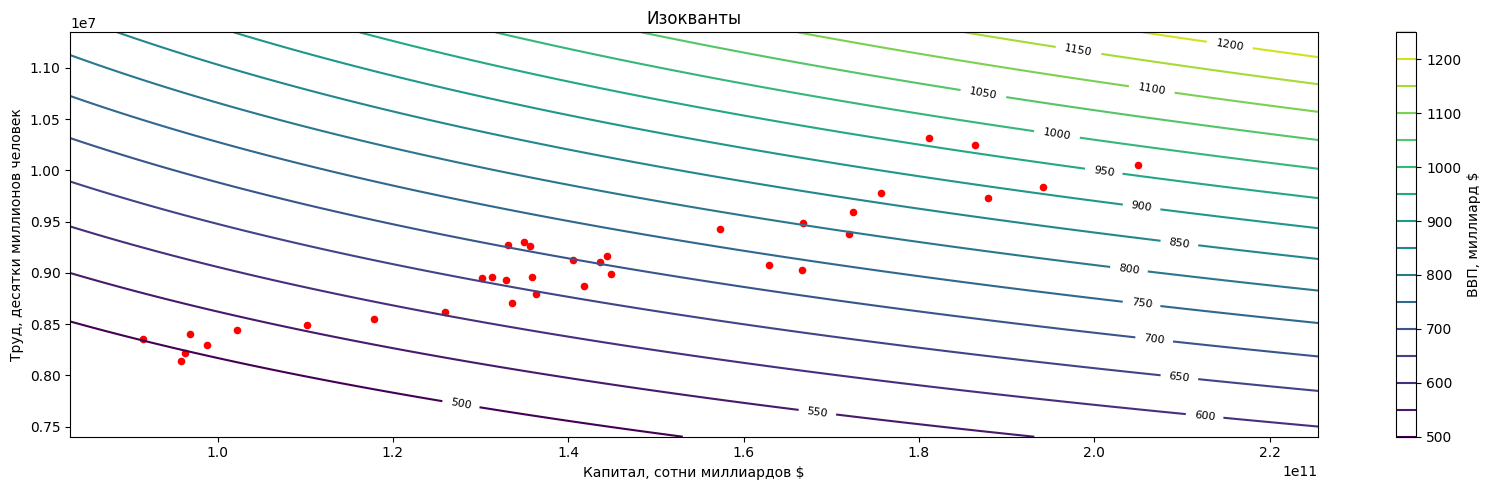

In [43]:
def cobb_douglas(K, L):
  return base_gdp / 100 * A * (K/base_capital*100)**alpha * (L/base_labor*100)**beta

K = np.linspace(data['capital_real'].min()/1.1, data['capital_real'].max()*1.1, 100)
L = np.linspace(data['labor_real'].min()/1.1, data['labor_real'].max()*1.1, 100)
K_grid, L_grid = np.meshgrid(K, L)

Y = cobb_douglas(K_grid,L_grid)
levels = np.arange(500,1300,50)*1e9


plt.figure(figsize=(16.5, 5))
contours = plt.contour(K, L, Y, levels=levels)
plt.colorbar(contours, label="ВВП, миллиард $", format=lambda x, pos: f'{int(x/1e9)}')
plt.clabel(contours, inline=True, fontsize=8, fmt=lambda x: f'{int(x/1e9)}',colors='black')

plt.scatter(data['capital_real'], data['labor_real'], color="red",s=20)
plt.title("Изокванты")
plt.xlabel("Капитал, сотни миллиардов $")
plt.ylabel("Труд, десятки миллионов человек")
plt.tight_layout()



**3.6.2 Средняя производительность капитала (труда)**

$$
AP_K(F) = \frac{F(K,L)}{K}
\qquad
\left( AP_L(F) = \frac{F(K,L)}{L} \right)
$$




которая показывает среднюю отдачу каждой единицы капитала
(труда).

$$
AP_K(F) = A K^{α-1} L^{β} \\
AP_L(F) = A K^α L^{β-1}
$$

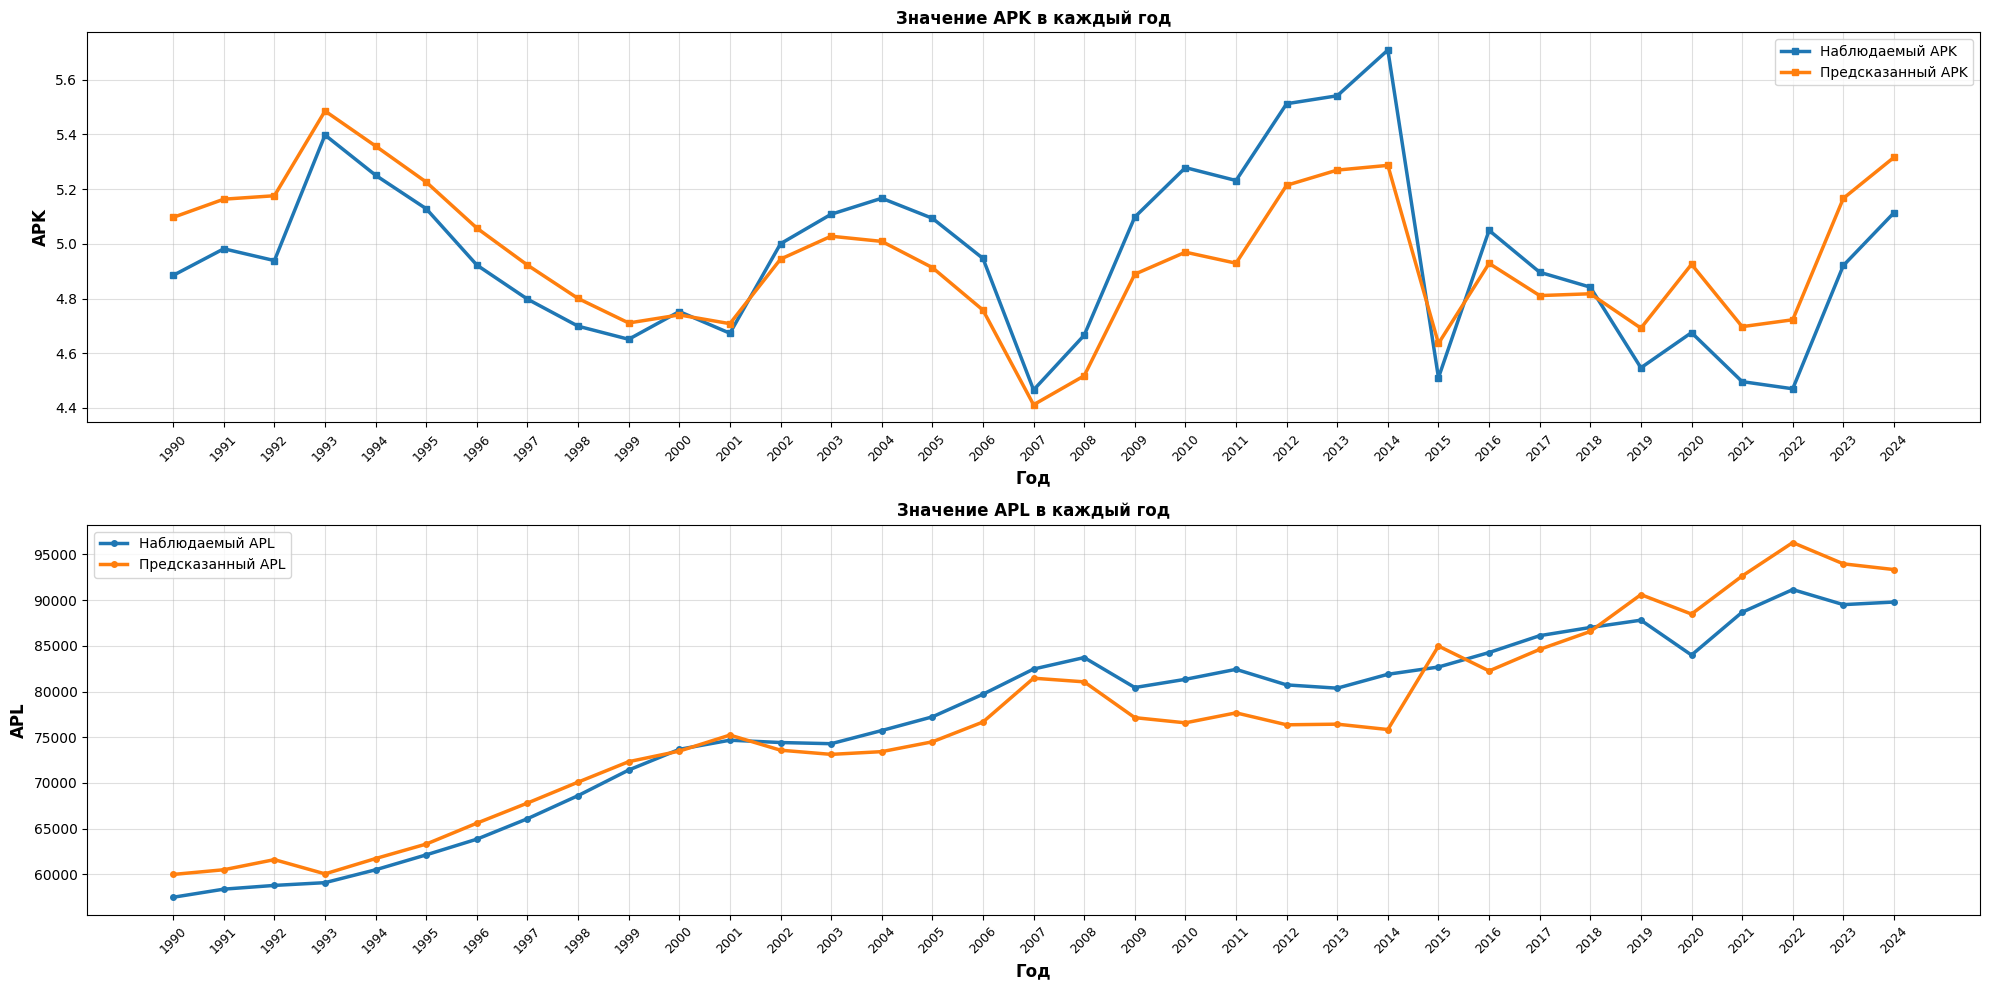

In [44]:
def AP_K(K, L):
    return cobb_douglas(K,L) / K
def AP_L(K, L):
    return cobb_douglas(K,L) / L

data['APK_real'] = data['gdp_real'] / data['capital_real']
data['APL_real'] = data['gdp_real'] / data['labor_real']
data['APK_pred'] = AP_K(data['capital_real'], data['labor_real'])
data['APL_pred'] = AP_L(data['capital_real'], data['labor_real'])



fig, axes = plt.subplots(2,1, figsize=(20, 10))

axes[0].plot(data['year'], data['APK_real'], label='Наблюдаемый APK', linewidth=2.5, marker='s', markersize=4)
axes[0].plot(data['year'], data['APK_pred'], label='Предсказанный APK', linewidth=2.5, marker='s', markersize=4)

axes[0].set_xlabel('Год', fontsize=12, fontweight='bold')
axes[0].set_ylabel('APK', fontsize=12, fontweight='bold')
axes[0].set_title('Значение APK в каждый год', fontsize=12, fontweight='bold')

axes[0].grid(True, alpha=0.4)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45, labelsize=9)

axes[1].plot(data['year'], data['APL_real'], label='Наблюдаемый APL', linewidth=2.5, marker='o', markersize=4)
axes[1].plot(data['year'], data['APL_pred'], label='Предсказанный APL', linewidth=2.5, marker='o', markersize=4)

axes[1].set_xlabel('Год', fontsize=12, fontweight='bold')
axes[1].set_ylabel('APL', fontsize=12, fontweight='bold')
axes[1].set_title('Значение APL в каждый год', fontsize=12, fontweight='bold')

axes[1].grid(True, alpha=0.4)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45, labelsize=9)

plt.tight_layout()
plt.show()



**3.6.3 Предельная производительность капитала (труда);**

$$
MP_K(F) = \frac{∂F(K,L)}{∂K}
\qquad
\left(
MP_L(F) = \frac{∂F(K,L)}{∂L}
\right)
$$

приближенно показывает на сколько измениться объем выпуска
продукции в случае использования дополнительной единицы капитала (труда) и неизменном количестве труда (капитала).

$$
MP_K(F) = α \cdot AP_K(F) = α A K^{α-1} L^{β} \\
MP_L(F) = β \cdot AP_L(F) = β A K^α L^{β-1}
$$

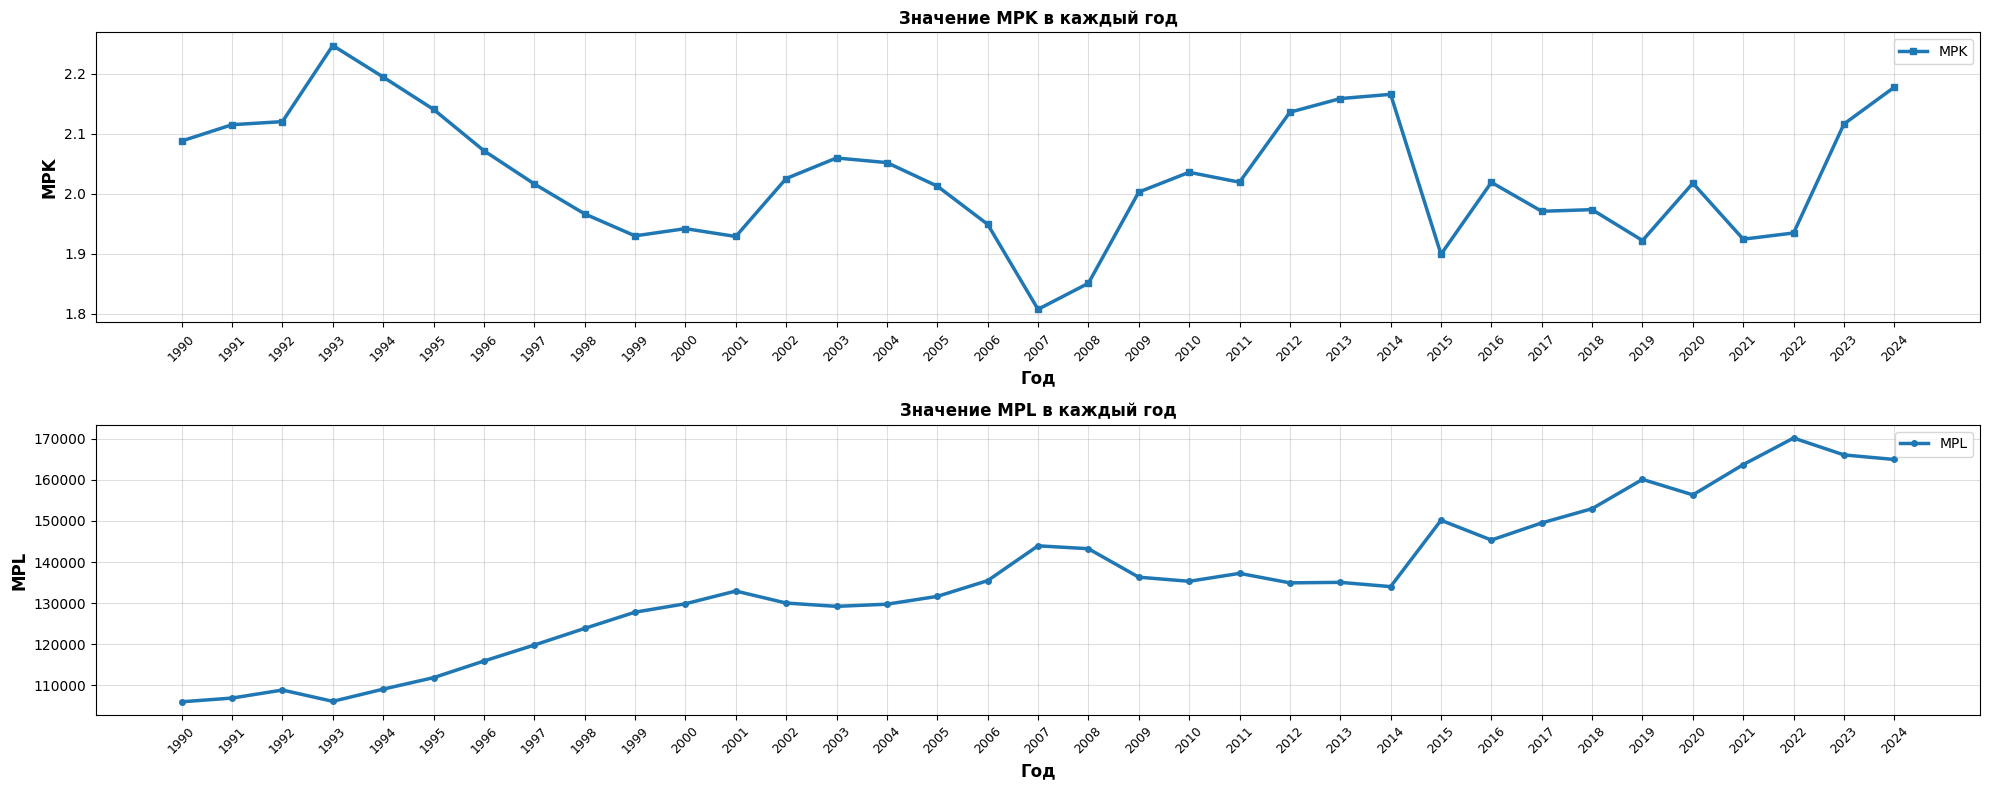

In [45]:
def MP_K(K, L):
    return alpha * AP_K(K,L)

def MP_L(K, L):
    return beta * AP_L(K,L)


data['MPK'] = MP_K(data['capital_real'], data['labor_real'])
data['MPL'] = MP_L(data['capital_real'], data['labor_real'])


fig, axes = plt.subplots(2,1, figsize=(20, 8))

axes[0].plot(data['year'], data['MPK'], label='MPK', linewidth=2.5, marker='s', markersize=4)

axes[0].set_xlabel('Год', fontsize=12, fontweight='bold')
axes[0].set_ylabel('MPK', fontsize=12, fontweight='bold')
axes[0].set_title('Значение MPK в каждый год', fontsize=12, fontweight='bold')

axes[0].grid(True, alpha=0.4)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45, labelsize=9)

axes[1].plot(data['year'], data['MPL'], label='MPL', linewidth=2.5, marker='o', markersize=4)

axes[1].set_xlabel('Год', fontsize=12, fontweight='bold')
axes[1].set_ylabel('MPL', fontsize=12, fontweight='bold')
axes[1].set_title('Значение MPL в каждый год', fontsize=12, fontweight='bold')

axes[1].grid(True, alpha=0.4)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45, labelsize=9)

plt.tight_layout()
plt.show()




**3.6.4 эластичность выпуска по капиталу (по труду);**

$$
E_K(F) = \frac{MP_K(F)}{AP_K(F)} ≡ \frac{K}{F(K,L)} \frac{∂F(K,L)}{∂K}
\qquad
\left(
E_L(F) = \frac{MP_L(F)}{AP_L(F)} ≡ \frac{L}{F(K,L)} \frac{∂F(K,L)}{∂L}
\right)
$$


которая приближенно показывает на сколько процентов измениться объем выпуска продукции при изменении количества капитала (труда) на 1% и условии, что количество труда (капитала) остается неизменным;

$$
E_K(F) = α \\
E_L(F) = β
$$

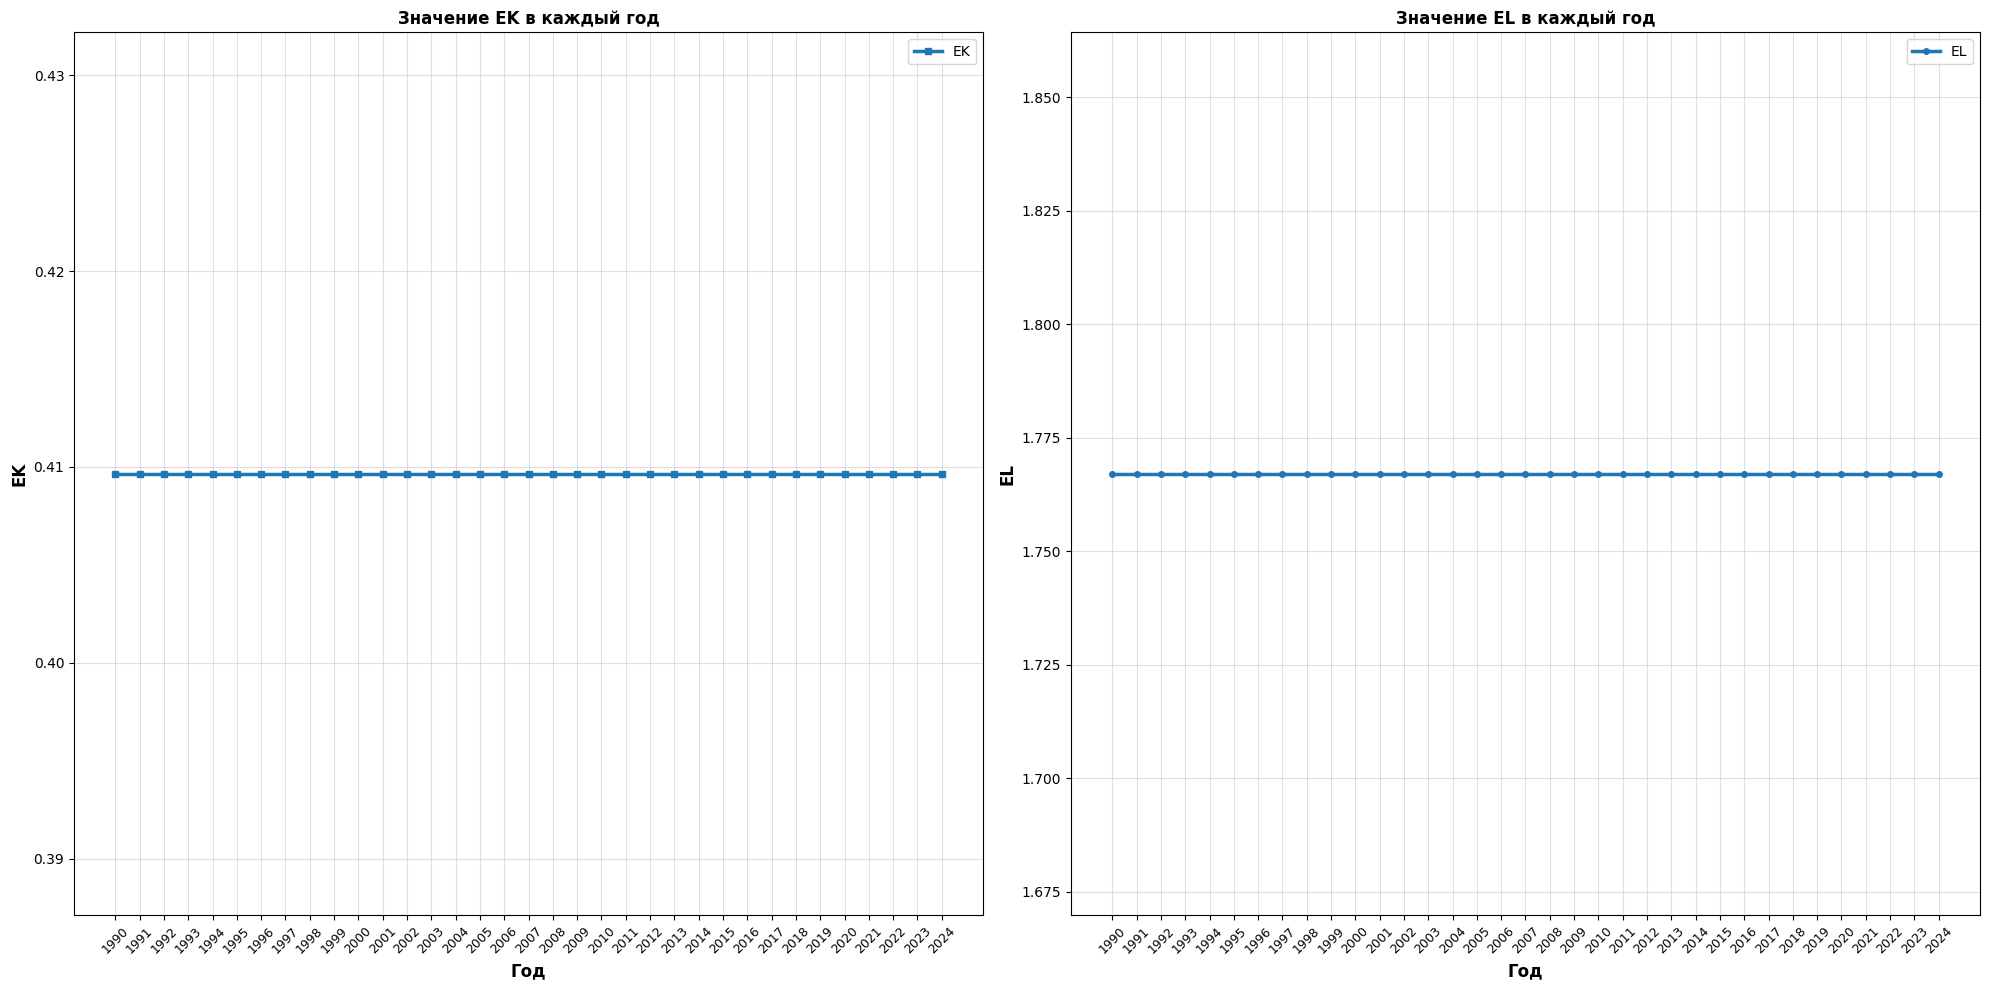

In [46]:


def E_K(K,L):
    return MP_K(K,L) / AP_K(K,L)
def E_L(K,L):
    return MP_L(K,L) / AP_L(K,L)



data['EK'] = E_K(data['capital_real'], data['labor_real'])
data['EL'] = E_L(data['capital_real'], data['labor_real'])


fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].plot(data['year'], data['EK'], label='EK', linewidth=2.5, marker='s', markersize=4)

axes[0].set_xlabel('Год', fontsize=12, fontweight='bold')
axes[0].set_ylabel('EK', fontsize=12, fontweight='bold')
axes[0].set_title('Значение EK в каждый год', fontsize=12, fontweight='bold')

axes[0].grid(True, alpha=0.4)
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45, labelsize=9)

axes[1].plot(data['year'], data['EL'], label='EL', linewidth=2.5, marker='o', markersize=4)

axes[1].set_xlabel('Год', fontsize=12, fontweight='bold')
axes[1].set_ylabel('EL', fontsize=12, fontweight='bold')
axes[1].set_title('Значение EL в каждый год', fontsize=12, fontweight='bold')

axes[1].grid(True, alpha=0.4)
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45, labelsize=9)

plt.tight_layout()
plt.show()


**3.6.5 Эластичность производства (или эластичность выпуска по масштабу производства);**



$$
E(F) = \lim_{t \to 1} \frac{t}{F(tK,tL)} \frac{∂F(tK,tL)}{∂t} ≡ E_K(F) + E_L(F)
$$


которая приближенно показывает на сколько процентов измениться объем выпуска продукции, если масштаб использования
факторов измениться на 1%;

$$
E(F) = α + β
$$

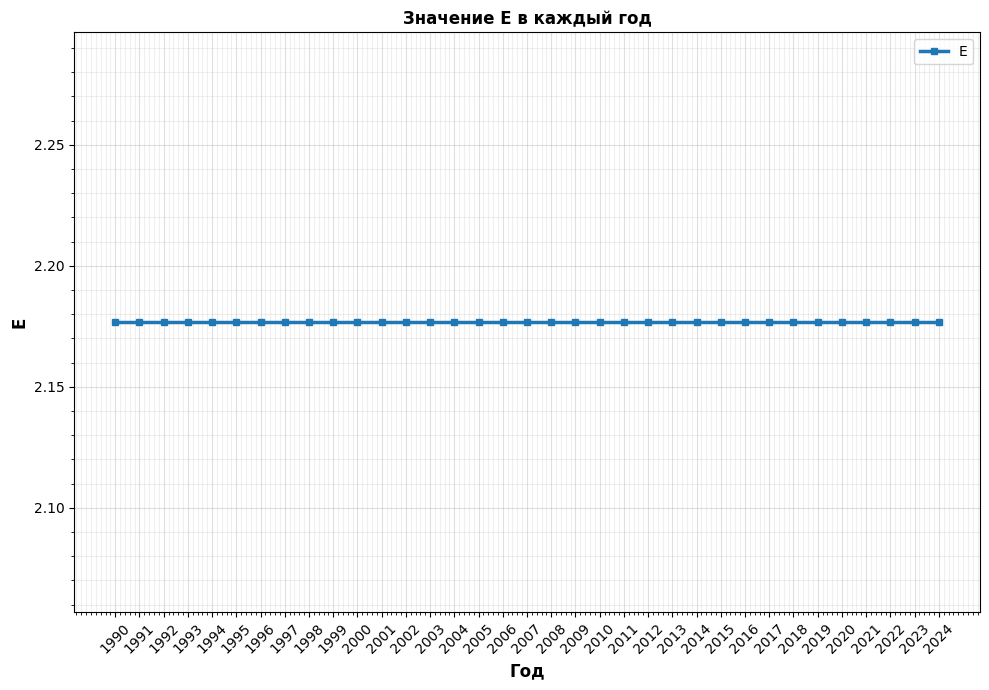

In [47]:
def E(K,L):
    return E_K(K,L) + E_L(K,L)

data['E'] = E(data['capital_real'], data['labor_real'])


plt.figure(figsize=(10, 7))

plt.plot(data['year'], data['E'], label='E', linewidth=2.5, marker='s', markersize=4)

plt.xlabel('Год', fontsize=12, fontweight='bold')
plt.ylabel('E', fontsize=12, fontweight='bold')
plt.title('Значение E в каждый год', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.grid(True, alpha=0.4)
plt.legend()

plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)

plt.tight_layout()
plt.show()



**3.6.6 предельная норма технического замещения (труда капиталом)**



$$
MRTS_{LK}(F) = \frac{MP_L}{MP_K} = \frac{∂F(K,L)}{∂L} \frac{∂F(K,L)}{∂K}
$$

приближенно показывает на сколько процентов нужно увеличить или уменьшить использование капитала 𝐾 при уменьшении или увеличении труда
𝐿 на 1%.

$$
MRTS_{LK} = \frac{β}{α} \frac{K}{L}
$$

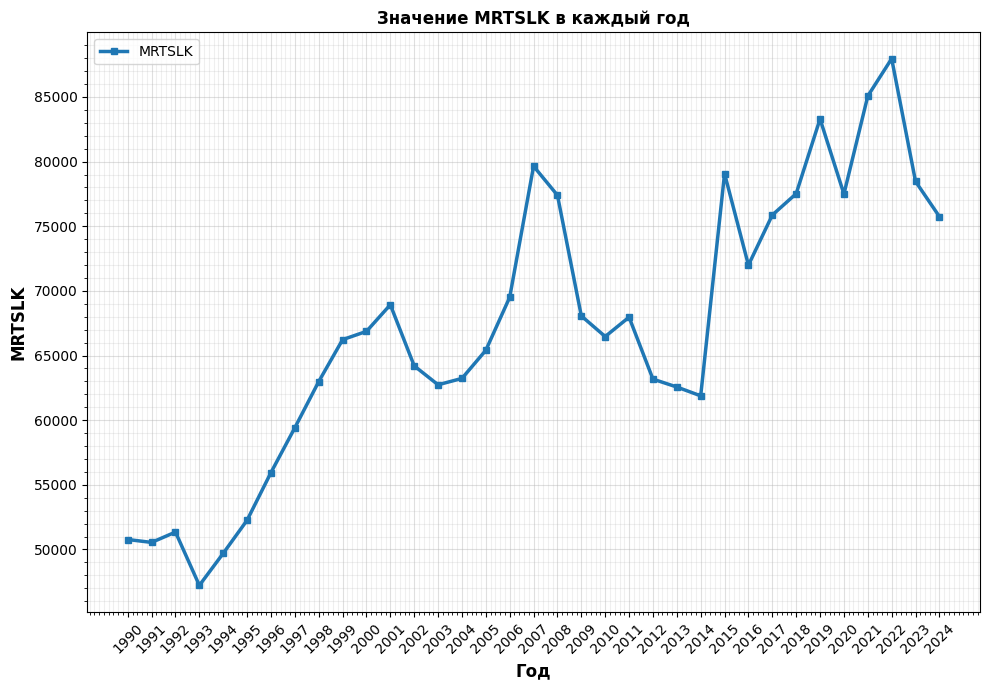

In [48]:
def MRTS_LK(K, L):
    return MP_L(K, L) / MP_K(K, L)

data['MRTSLK'] = MRTS_LK(data['capital_real'], data['labor_real'])


plt.figure(figsize=(10, 7))

plt.plot(data['year'], data['MRTSLK'], label='MRTSLK', linewidth=2.5, marker='s', markersize=4)

plt.xlabel('Год', fontsize=12, fontweight='bold')
plt.ylabel('MRTSLK', fontsize=12, fontweight='bold')
plt.title('Значение MRTSLK в каждый год', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.grid(True, alpha=0.4)
plt.legend()

plt.minorticks_on()
plt.grid(which='minor', alpha=0.2)

plt.tight_layout()
plt.show()


**3.6.7 Эластичность замещения по Хиксу (труда капиталом).**

$$
𝜎_{LK}^{H}(F) = \frac{d(K/L)}{K/L} \frac{dS_{LK}(F)}{S_{LK}(F)} = \frac{d \ln(K/L)}{d \ln(S_{LK}(F)}
$$

при F(K,L) = const,

которая приближенно показывает на сколько процентов измениться фондовооруженность труда 𝑘 = 𝐾 / 𝐿 при изменении предельной нормы замещения $S_{LK}(F)$ на 1%.

Для функции Кобба-Дугласа это значение всегда равно 1

Литература:

https://www.econstor.eu/bitstream/10419/228067/1/1676938893.pdf

https://jigjids.wordpress.com/wp-content/uploads/2011/02/cobb-dauglas-tanproj.pdf

https://scikit-learn.org/stable/https://scikit-learn.org/stable/

https://elib.grsu.by/katalog/808985_351866pdf.pdf?d=true

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.t_test.html